## Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

## Data Gathering

In [84]:
data = pd.read_csv('Data/Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [11]:
data['label'].value_counts()

0    20019
1    19981
Name: label, dtype: int64

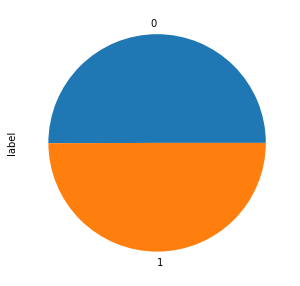

In [12]:
data['label'].value_counts().plot(kind='pie', figsize=(20, 5))
plt.show()

- Consider '1' as a positive review and '0' as a negative review

## Data Processing

In [85]:
wordnet = WordNetLemmatizer()

In [86]:
def text_tokens(s):
    stopword = set(stopwords.words('english'))
    s = s.lower()
    tokens = word_tokenize(s)
    tokens = [wordnet.lemmatize(word) for word in tokens]
    tokens = [token for token in tokens if token not in stopword]
    tokens = [token for token in tokens if token >= 'a' and token <= 'z']
    return tokens

In [87]:
data['text'] = data['text'].apply(lambda x: text_tokens(x))

In [88]:
word_index_map = {}
current_index = 0

In [89]:
for text in data['text']:
    for token in text:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

In [90]:
print("Length :",len(word_index_map))

Length : 128117


In [91]:
def token_vector(tokens, label):
    x = np.zeros(len(word_index_map) + 1)
    for t in tokens:
        if t in word_index_map:
            index = word_index_map[t]
            x[index] += 1
    x = x/x.sum()
    x[-1] = label
    return x

## Setting a trainset for further data process

In [121]:
trainset = data.iloc[:5001,:]

In [122]:
N = len(trainset)
_data = np.zeros((N, len(word_index_map)+1))
i = 0

In [123]:
idx = 0
for idx in range(len(trainset)):
    tokens = trainset.iloc[idx,0]
    label = trainset.iloc[idx,1]
    xy = token_vector(tokens,label)
    _data[i,:] = xy
    i += 1

## Modelling

In [124]:
X = _data[:,:-1]
y = _data[:,-1]

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [126]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
model.score(X_test,y_test)

0.6985205917632947

## Word Scores

In [138]:
threshold = 0.5
for word, index in (word_index_map).items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

movie -1.858833013456853
would -1.019952805499664
wa -1.6564812564083693
could -1.2009188644312305
waste -0.7145395028996789
br -0.5535938088847131
bad -2.456990823815904
like -0.9484755555717643
n't -1.7791831233823572
nothing -0.7195710873054443
even -0.969804089230453
minute -0.6112367103097338
acting -0.6997720416284843
script -0.5585184988569132
something -0.5306323054548074
boring -0.6562520284003559
terrible -0.7098093921398584
guy -0.6023636936816659
plot -0.7480860839907196
stupid -0.537750344616466
awful -0.6241090233710965
least -0.5490473138513227
worst -1.2694527765347363
